In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#import budgets file
budgets_df = pd.read_csv('../data/zippedData/tn.movie_budgets.csv.gz', compression = 'gzip')
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#function to make dollar amounts into integers
def dollars_to_int(column):
    budgets_df[column] = [int(x.strip('$').replace(',', '')) for x in budgets_df[column]]
    return budgets_df

In [4]:
dollars_to_int('production_budget')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,$0,$0
5778,79,"Apr 2, 1999",Following,6000,"$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,$0


In [5]:
dollars_to_int('domestic_gross')
dollars_to_int('worldwide_gross')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [6]:
#add release year column to df
budgets_df['release_year'] = [int(x[-4:]) for x in budgets_df['release_date']]

In [7]:
# add return on investment columns to df
budgets_df['domestic_roi'] = budgets_df['domestic_gross'] / budgets_df['production_budget']
budgets_df['worldwide_roi'] = budgets_df['worldwide_gross'] / budgets_df['production_budget']

In [8]:
budgets_df.sort_values(by = ['domestic_roi', 'worldwide_roi'], ascending = False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_roi,worldwide_roi
5745,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,1972,1800.000000,1800.000000
5773,74,"Feb 26, 1993",El Mariachi,7000,2040920,2041928,1993,291.560000,291.704000
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,2009,239.819578,431.517853
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,1999,234.231832,413.833333
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,2015,227.644100,416.564740


In [9]:
#check for NaN values in df
budgets_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
domestic_roi         0
worldwide_roi        0
dtype: int64

In [10]:
#remove movies without data for 'domestic_gross'
budgets_df = budgets_df[budgets_df["domestic_gross"] != 0]

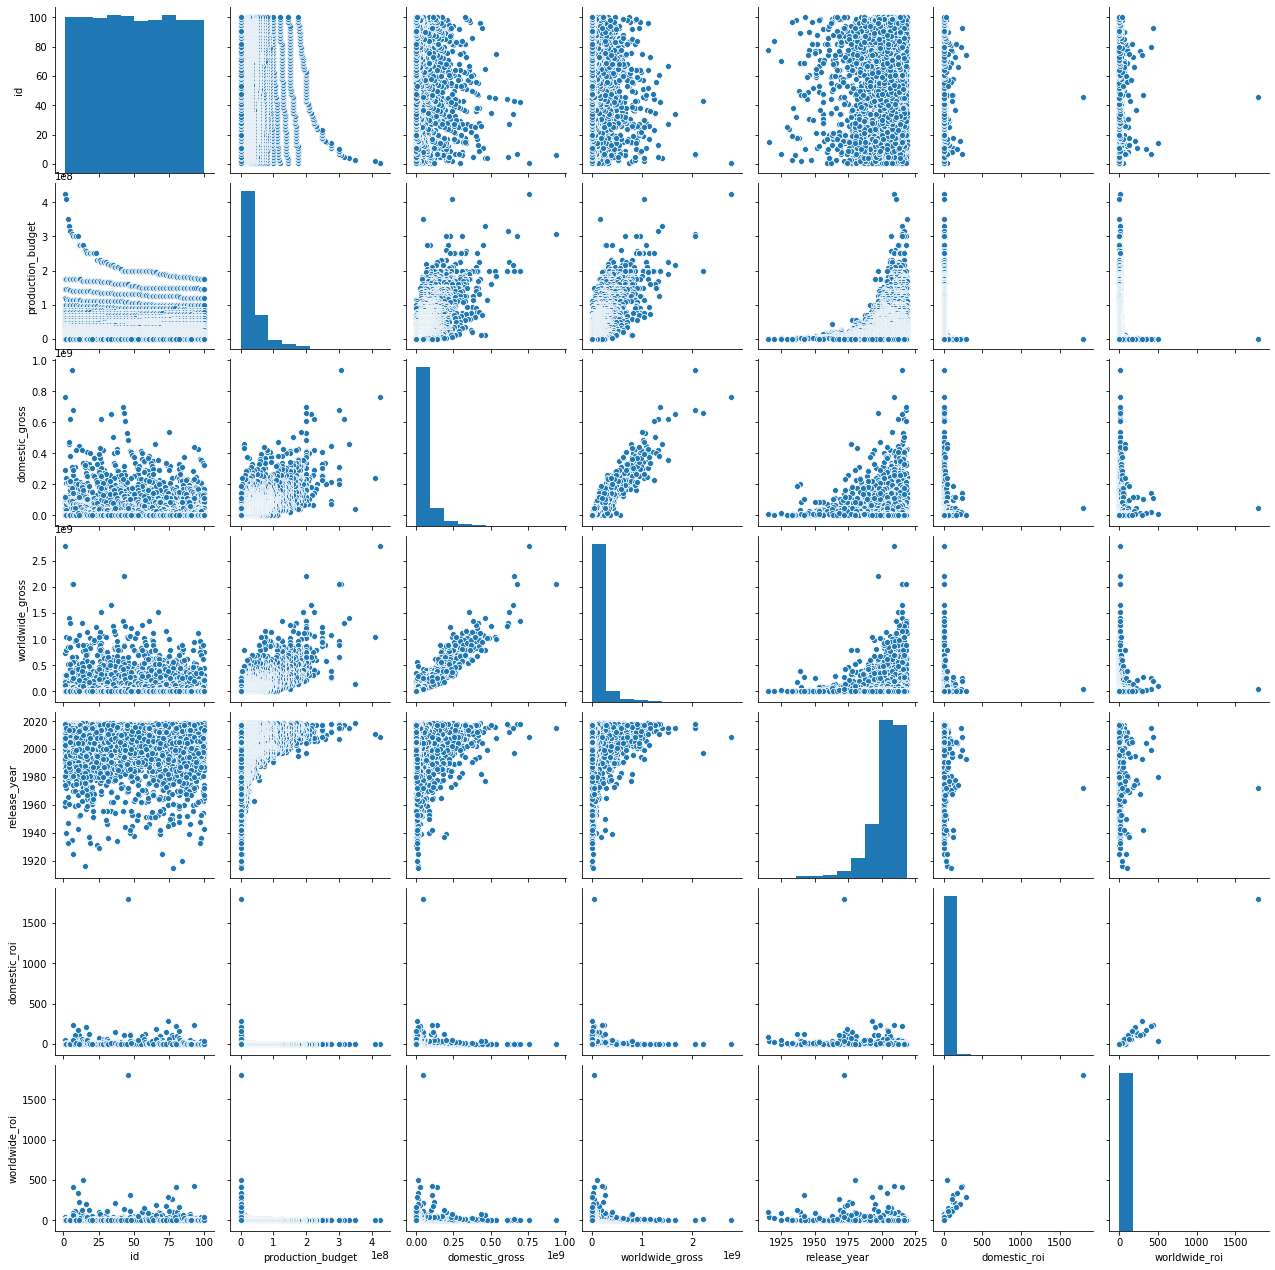

In [11]:
#pairplot to look for interesting trends to explore
sns.pairplot(budgets_df)

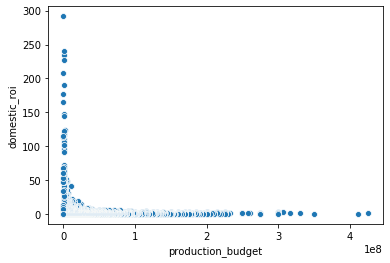

In [12]:
#further investigate budgets vs domestic_roi, eliminating the outlier 'Deep Throat' to see rest of data better
sns.scatterplot(data = budgets_df[budgets_df['movie']  != 'Deep Throat'], x = 'production_budget', y = 'domestic_roi')


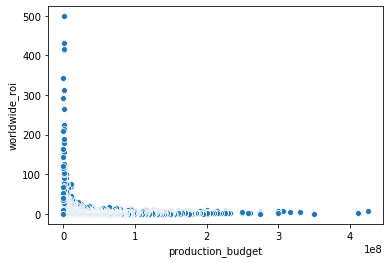

In [13]:
#same as above but for worldwide roi
sns.scatterplot(data= budgets_df[budgets_df['movie']  != 'Deep Throat'], x = 'production_budget', y = 'worldwide_roi')

In [52]:
#create new df to contain high and low roi movies, based on both domestic and worldwide roi
dom_high_roi_df = budgets_df[budgets_df['domestic_roi'] >= 50]
ww_high_roi_df = budgets_df[budgets_df['worldwide_roi'] >= 100]
dom_low_roi_df = budgets_df[budgets_df['domestic_roi'] < 50]
ww_low_roi_df = budgets_df[budgets_df['worldwide_roi'] < 100]

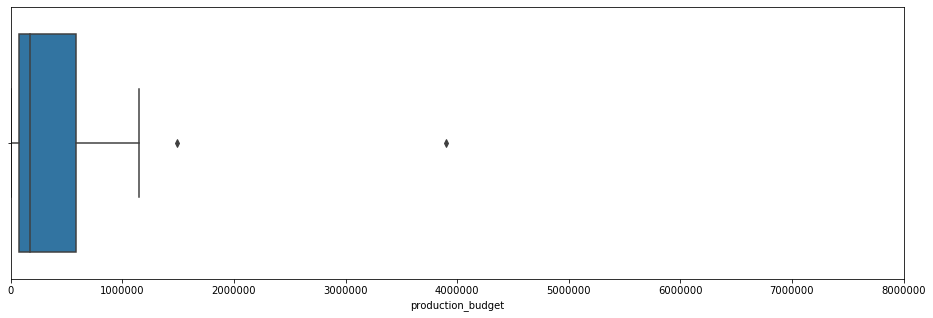

In [57]:
#box plot to see distribution of production budgets for high domestic roi films
plt.figure(figsize = (16, 5))
plt.xlim(0, 8000000)
sns.boxplot(dom_high_roi_df['production_budget'])

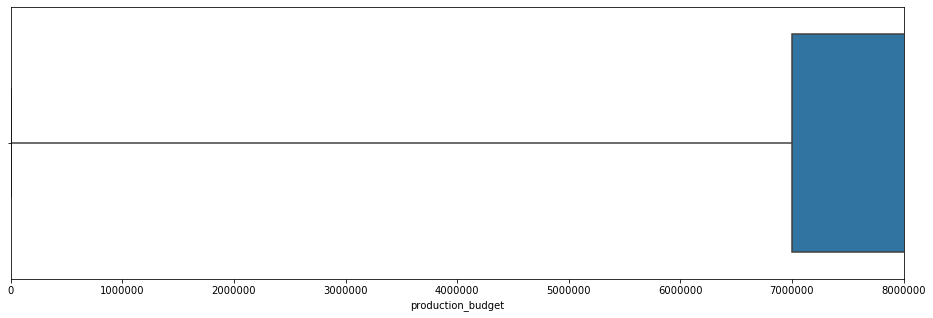

In [58]:
#box plot to see distribution of production budgets for low domestic roi films
plt.figure(figsize = (16, 5))
plt.xlim(0, 8000000)
sns.boxplot(dom_low_roi_df['production_budget'])

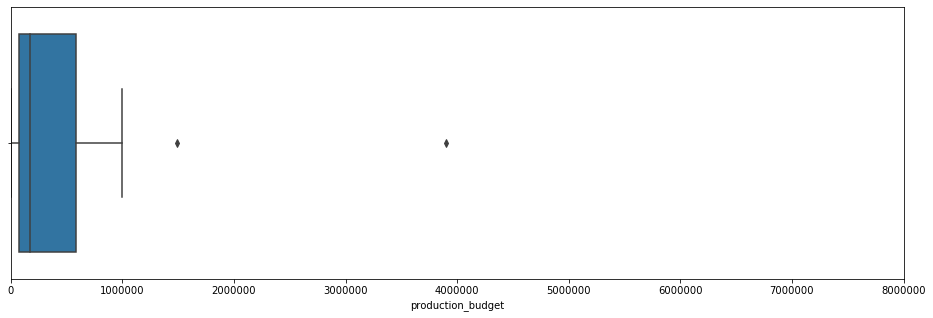

In [59]:
#boxplot to see distribution of production budgets for high worldwide roi films
plt.figure(figsize = (16, 5))
plt.xlim(0, 8000000)
sns.boxplot(ww_high_roi_df['production_budget'])

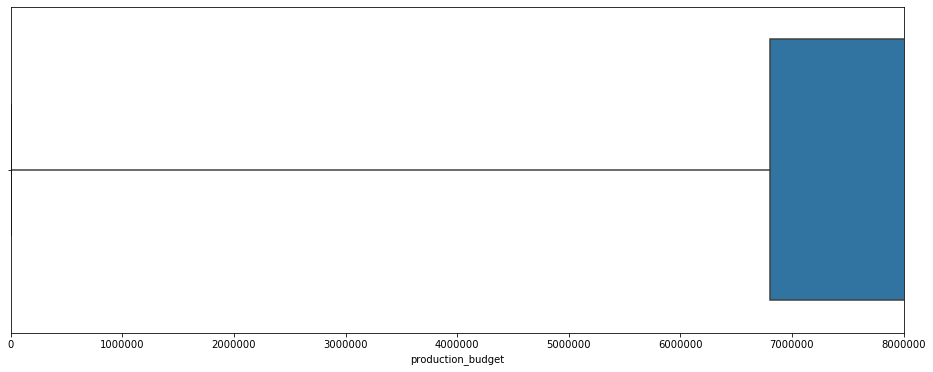

In [56]:
#boxplot to see distribution of production budgets for low worldwide roi films
plt.figure(figsize = (16, 5))
plt.xlim(0, 8000000)
sns.boxplot(ww_low_roi_df['production_budget'])

In [19]:
#the high roi films mostly have budgets under $1,500,000, so creating data set of films with budgets under that amount
lower_budget_df = budgets_df[budgets_df['production_budget'] <= 1500000]

In [43]:
#check for duplicate titles in new df
lower_budget_df[lower_budget_df.duplicated(['movie'], keep = False)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_roi,worldwide_roi


In [21]:
#import basics df
basics_df = pd.read_csv('../data/zippedData/imdb.title.basics.csv.gz', compression = 'gzip')

In [22]:
#fill NaN genres with string 'unknown', separate genres from single string into a list
basics_df['genres'] = basics_df['genres'].fillna('unknown')
basics_df['genres'] = [x.split(',') for x in basics_df['genres']] 

In [23]:
ratings_df = pd.read_csv('../data/zippedData/imdb.title.ratings.csv.gz', compression = 'gzip')
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [24]:
basics_ratings_df = basics_df.join(ratings_df.set_index('tconst'), on = 'tconst')

In [25]:
basics_ratings_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,[Drama],NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,[Documentary],NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,[Comedy],NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,[unknown],NaN,NaN


In [26]:
basics_ratings_df.sort_values(by = ['primary_title']).head(50)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
13871,tt1699720,!Women Art Revolution,Women Art Revolution,2010,83.0,[Documentary],6.9,196.0
37039,tt2346170,#1 Serial Killer,#1 Serial Killer,2013,87.0,[Horror],5.6,40.0
52892,tt3120962,#5,#5,2013,68.0,"[Biography, Comedy, Fantasy]",6.8,6.0
131857,tt8219776,#5,#5,2018,NaN,[Documentary],NaN,NaN
77936,tt4470336,#50Fathers,#50Fathers,2015,132.0,[Comedy],NaN,NaN
90852,tt5255986,#66,#66,2015,116.0,[Action],5.3,18.0
131013,tt8134344,#82 Summits,#82 Summits,2015,50.0,[Documentary],NaN,NaN
127970,tt7853996,#ALLMYMOVIES,#ALLMYMOVIES,2015,NaN,[Documentary],8.3,21.0
145611,tt9844890,#AbroHilo,#AbroHilo,2019,52.0,[Documentary],6.6,8.0
105561,tt6170868,#BKKY,#BKKY,2016,75.0,[Drama],7.4,23.0


In [47]:
lower_budget_df.sort_values(by = ['movie'])

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_roi,worldwide_roi
5289,90,"Sep 3, 2010",16 to Life,1000000,11574,11574,2010,0.011574,0.011574
5708,9,"Feb 26, 1999",20 Dates,66000,541636,602920,1999,8.206606,9.135152
5236,37,"Jun 14, 2013",20 Feet From Stardom,1000000,4946250,5892466,2013,4.946250,5.892466
5614,15,"Dec 24, 1916","20,000 Leagues Under the Sea",200000,8000000,8000000,1916,40.000000,40.000000
5263,64,"Oct 24, 2014",23 Blast,1000000,549185,549185,2014,0.549185,0.549185
...,...,...,...,...,...,...,...,...,...
5435,36,"Jun 16, 2006",Wordplay,500000,3121270,3177636,2006,6.242540,6.355272
5267,68,"Oct 19, 2007",Wristcutters: A Love Story,1000000,446165,473769,2007,0.446165,0.473769
5160,61,"Nov 10, 2000",You Can Count on Me,1200000,9180275,10827356,2000,7.650229,9.022797
5216,17,"Aug 23, 2013",You're Next,1000000,18494006,26887177,2013,18.494006,26.887177


In [28]:
budgets_df['movie'].isin(basics_ratings_df['primary_title']).value_counts()

False    3175
True     2059
Name: movie, dtype: int64

In [29]:
budgets_df['movie'].isin(basics_ratings_df['original_title']).value_counts()

False    3220
True     2014
Name: movie, dtype: int64

In [39]:
basics_ratings_df = basics_ratings_df.drop(columns = ['original_title'])

In [51]:
basics_ratings_df['start_year'].describe()

count    146144.000000
mean       2014.621798
std           2.733583
min        2010.000000
25%        2012.000000
50%        2015.000000
75%        2017.000000
max        2115.000000
Name: start_year, dtype: float64

In [49]:
basics_ratings_df[basics_ratings_df['primary_title'].str.contains('About You')]

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
2435,tt10246332,This Is Not About You,2019,NaN,[Drama],NaN,NaN
2567,tt10265444,"Mother, I Am Suffocating. This Is My Last Film...",2019,76.0,[Documentary],NaN,NaN
17805,tt1792130,Six Things I Know About You,2010,95.0,[Drama],NaN,NaN
19738,tt1840343,It's About You,2010,86.0,"[Biography, Documentary, Music]",5.3,35.0
35385,tt2302531,All About You,2012,83.0,[Drama],6.2,70.0
39849,tt2417768,The Truth About You,2014,88.0,"[Comedy, Romance]",6.2,5.0
48470,tt2883346,50 in 50: A Film About You and Me,2013,51.0,"[Comedy, Documentary, History]",NaN,NaN
53299,tt3142110,Crazy About You,2013,51.0,[Documentary],7.0,8.0
58277,tt3397228,Almost Famous: A Documentary About Youtube,2014,78.0,"[Comedy, Documentary, Family]",NaN,NaN
119717,tt7199026,Look About You,2017,81.0,[Documentary],NaN,NaN


In [46]:
lower_budget_df[lower_budget_df['movie'].str.contains('CJ7')]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_roi,worldwide_roi


In [31]:
roi_basics_ratings_df = lower_budget_df.merge(basics_ratings_df, how = 'inner', left_on = ['movie', 'release_year'], right_on = ['primary_title', 'start_year'])

In [32]:
roi_basics_ratings_df.sort_values(by='movie')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_roi,worldwide_roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
22,64,"Oct 24, 2014",23 Blast,1000000,549185,549185,2014,0.549185,0.549185,tt2304459,23 Blast,23 Blast,2014,98.0,"[Drama, Family, Sport]",6.5,1567.0
3,85,"Oct 21, 2016",31,1500000,779820,922727,2016,0.519880,0.615151,tt3835080,31,31,2016,102.0,"[Horror, Thriller]",5.1,15055.0
61,86,"Jul 7, 2017",A Ghost Story,100000,1594798,2769782,2017,15.947980,27.697820,tt6265828,A Ghost Story,A Ghost Story,2017,92.0,"[Drama, Fantasy, Romance]",6.8,46280.0
59,48,"Jul 22, 2011",Another Earth,175000,1321194,2102779,2011,7.549680,12.015880,tt1549572,Another Earth,Another Earth,2011,92.0,"[Drama, Romance, Sci-Fi]",7.0,85839.0
44,100,"Jul 11, 2014",As It Is in Heaven,450000,13486,13486,2014,0.029969,0.029969,tt2176228,As It Is in Heaven,As It Is in Heaven,2014,86.0,[Drama],7.3,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,70,"Mar 23, 2018",Unsane,1500000,7690044,14244931,2018,5.126696,9.496621,tt7153766,Unsane,Unsane,2018,98.0,"[Drama, Horror, Mystery]",6.4,32049.0
57,43,"Sep 23, 2011",Weekend,190000,484592,1577585,2011,2.550484,8.303079,tt1791679,Weekend,Weekend,2011,121.0,"[Action, Comedy, Crime]",4.0,583.0
56,43,"Sep 23, 2011",Weekend,190000,484592,1577585,2011,2.550484,8.303079,tt1714210,Weekend,Weekend,2011,97.0,"[Drama, Romance]",7.6,25424.0
58,43,"Sep 23, 2011",Weekend,190000,484592,1577585,2011,2.550484,8.303079,tt1910670,Weekend,Weekend,2011,80.0,"[Comedy, Drama]",NaN,NaN


In [33]:
roi_basics_ratings_df[roi_basics_ratings_df['domestic_roi'] > 25]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_roi,worldwide_roi,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
12,12,"Jan 6, 2012",The Devil Inside,1000000,53262945,101759490,2012,53.262945,101.75949,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,[Horror],4.2,33522.0
60,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,2015,227.644100,416.56474,tt2309260,The Gallows,The Gallows,2015,81.0,"[Horror, Mystery, Thriller]",4.2,17763.0


In [44]:
lower_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,domestic_roi,worldwide_roi
5062,63,"Apr 1, 2011",Insidious,1500000,54009150,99870886,2011,36.006100,66.580591
5063,64,"Oct 21, 2016",Moonlight,1500000,27854931,65245512,2016,18.569954,43.497008
5064,65,"Sep 12, 2003",Cabin Fever,1500000,21158188,30351664,2003,14.105459,20.234443
5065,66,"May 2, 2007",Waitress,1500000,19097550,22217183,2007,12.731700,14.811455
5066,67,"Sep 8, 1989",Kickboxer,1500000,14533681,14533681,1989,9.689121,9.689121
...,...,...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644,2006,10.010143,10.234857
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,2004,0.128571,0.128571
5778,79,"Apr 2, 1999",Following,6000,48482,240495,1999,8.080333,40.082500
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005,0.267600,0.267600
